## Analysis of Terrorist Attacts from 1970 until 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile
import pysal
from pandas.core import datetools

/Users/baurjansafi/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
df = pd.read_csv('../data/globalterrorismdb_0617dist.csv', low_memory=False)

In [6]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(df)

missing values 
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            162886
extended                   0
resolution            168131
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14502
city                     446
latitude                4606
longitude               4606
specificity                4
vicinity                   0
location              122376
summary                66138
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           143719
alternative_txt       143719
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            109805
propextent_txt        109805
propvalue             13486

202
nhostkidus
27
nhours
35
ndays
313
divert
143
kidhijcountry
217
ransom
3
ransomamt
395
ransomamtus
22
ransompaid
136
ransompaidus
8
ransomnote
345
hostkidoutcome
7
hostkidoutcome_txt
7
nreleased
150
addnotes
14150
scite1
75887
scite2
56562
scite3
32562
dbsource
26
INT_LOG
3
INT_IDEO
3
INT_MISC
3
INT_ANY
3
related
20829


In [7]:
for i in df.columns:
    print i, '\n'
    print type(df[i][10])
    print len(df[i].unique())
    print df[i].unique()
    print '========'
    


eventid 

<type 'numpy.int64'>
170350
[197000000001 197000000002 197001000001 ..., 201612310043 201612310044
 201701270001]
iyear 

<type 'numpy.int64'>
46
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982 1983
 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]
imonth 

<type 'numpy.int64'>
13
[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
iday 

<type 'numpy.int64'>
32
[ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4  7
 16 17 18 23 24  5 29]
approxdate 

<type 'float'>
1834
[nan 'January 19-20, 1970' 'February 6-9, 1970' ..., '2016-12-28 00:00:00'
 'December 26-31, 2016' '2016-12-31 00:00:00']
extended 

<type 'numpy.int64'>
2
[0 1]
resolution 

<type 'float'>
1860
[nan '3/8/1970' '3/15/1970' ..., '12/2/2011' '12/9/2011' '12/27/2011']
country 

<type 'numpy.int64'>
205
[  58  130  160   78  101  217  218   98  499   65   83  222  362  199 

targsubtype2_txt 

<type 'float'>
98
[nan 'Police Security Forces/Officers' 'Other Personnel'
 'Restaurant/Bar/Caf\xe9' 'Student' 'Industrial/Textiles/Factory'
 'Politician or Political Party Movement/Meeting/Rally' 'Named Civilian'
 'Laborer (General)/Occupation Identified' 'Unnamed Civilian/Unspecified'
 'Radio' 'Police Building (headquarters, station, school)'
 'School/University/Educational Building' 'Gas/Oil'
 'Police Patrol (including vehicles and convoys)' 'Religion Identified'
 'Electricity'
 'Public Area (garden, parking lot, garage, beach, public building, camp)'
 'Procession/Gathering (funeral, wedding, birthday, religious)'
 'Military Personnel (soldiers, troops, officers, forces)'
 'Embassy/Consulate' 'Diplomatic Personnel (outside of embassy, consulate)'
 'Military Recruiting Station/Academy' 'Religious Figure'
 'Affiliated Institution' 'Government Building/Facility/Office'
 'Teacher/Professor/Instructor' 'Terrorist' 'Race/Ethnicity Identified'
 'Government Personnel (exc

10
[nan 'Call (post-incident)' 'Unknown' 'Letter' 'Note left at scene' 'Other'
 'Posted to website, blog, etc.' 'E-mail' 'Personal claim' 'Video']
claim3 

<type 'numpy.float64'>
3
[ nan   1.   0.]
claimmode3 

<type 'numpy.float64'>
9
[ nan   1.   9.   2.  10.   7.   6.   8.   4.]
claimmode3_txt 

<type 'float'>
9
[nan 'Letter' 'Other' 'Call (post-incident)' 'Unknown'
 'Posted to website, blog, etc.' 'Video' 'Personal claim' 'E-mail']
compclaim 

<type 'numpy.float64'>
4
[ nan   0.   1.  -9.]
weaptype1 

<type 'numpy.int64'>
12
[13  6  8  5  2  7  9 11 10  3 12  1]
weaptype1_txt 

<type 'str'>
12
['Unknown' 'Explosives/Bombs/Dynamite' 'Incendiary' 'Firearms' 'Chemical'
 'Fake Weapons' 'Melee' 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Radiological' 'Other' 'Biological']
weapsubtype1 

<type 'numpy.float64'>
30
[ nan  16.   5.   2.  19.  20.   4.  18.  11.  15.  28.  17.  10.  14.   1.
   9.   3.  21.  29.   7.  23.   8.  22.  

propcomment 

<type 'float'>
18345
[nan 'Three transformers were damaged.'
 'Basketball courts, weight room, swimming pool, gymnastic equipment, and lockers were destroyed.'
 ..., 'A truck and electric post were damaged in this attack.'
 'A town was damaged in this attack.'
 'A tetrapylon and part of a Roman theatre were damaged in the attack.']
ishostkid 

<type 'numpy.float64'>
4
[  0.   1.  nan  -9.]
nhostkid 

<type 'numpy.float64'>
203
[             nan   1.00000000e+00   5.00000000e+00   1.30000000e+01
   1.29000000e+02   6.00000000e+01   2.00000000e+00   5.50000000e+01
  -9.90000000e+01   1.55000000e+02   1.75000000e+02   3.00000000e+00
   4.40000000e+01   4.00000000e+00   6.00000000e+00   2.40000000e+01
   1.87000000e+02   6.10000000e+01   1.20000000e+01   2.00000000e+01
   1.10000000e+01   1.00000000e+01   4.00000000e+01   1.40000000e+02
   5.00000000e+01   3.00000000e+01   1.40000000e+01   7.00000000e+00
   1.60000000e+01   1.02000000e+02   1.80000000e+01   8.00000000e+00
   

In [8]:
# Get rid of the rows without geolocation details
df.longitude.dropna(axis = 0, inplace=True)

In [9]:
df_ = df[['iyear','imonth','iday', 'region', 'region_txt', 'country','country_txt','provstate',
          'city', 'latitude', 'longitude', 'location', 'attacktype1', 
          'attacktype1_txt', 'target1', 'targtype1_txt', 'targsubtype1',
          'motive','nkill','nwound','weaptype1']]
df_.shape

(170350, 21)

In [10]:
df_.rename(index = str, columns = {'iyear':'year','imonth':'month', 'iday':'day' }, inplace=True)

#Replace dates where day is 0 to 1
df_['day'] = df_.day.replace(0, 1)

#Drop those lines where month is 0
df_ = df_[df_.month != 0]

# Turn Year/Month/Day into a Date
df_['Date'] = pd.to_datetime(df_[['year', 'month', 'day']])

# Set Date as index
df_ = df_.set_index('Date')

# Let's check what we have
df_.head()

/Users/baurjansafi/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/baurjansafi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,year,month,day,region,region_txt,country,country_txt,provstate,city,latitude,...,location,attacktype1,attacktype1_txt,target1,targtype1_txt,targsubtype1,motive,nkill,nwound,weaptype1
Date,,,,,,,,,,,,,,,,,,,,,
1970-07-02,1970,7,2,2,Central America & Caribbean,58,Dominican Republic,NaN,Santo Domingo,18.456792,...,NaN,1,Assassination,Julio Guzman,Private Citizens & Property,68.0,NaN,1.0,0.0,13
1970-01-01,1970,1,1,5,Southeast Asia,160,Philippines,Tarlac,Unknown,15.478598,...,NaN,1,Assassination,Employee,Journalists & Media,54.0,NaN,1.0,0.0,13
1970-01-01,1970,1,1,8,Western Europe,78,Greece,Attica,Athens,37.983773,...,NaN,3,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),46.0,NaN,NaN,NaN,6
1970-01-01,1970,1,1,4,East Asia,101,Japan,NaN,Fukouka,33.580412,...,NaN,7,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),46.0,NaN,NaN,NaN,8
1970-01-01,1970,1,1,1,North America,217,United States,Illinois,Cairo,37.005105,...,NaN,2,Armed Assault,Cairo Police Headquarters,Police,22.0,To protest the Cairo Illinois Police Deparment,0.0,0.0,5


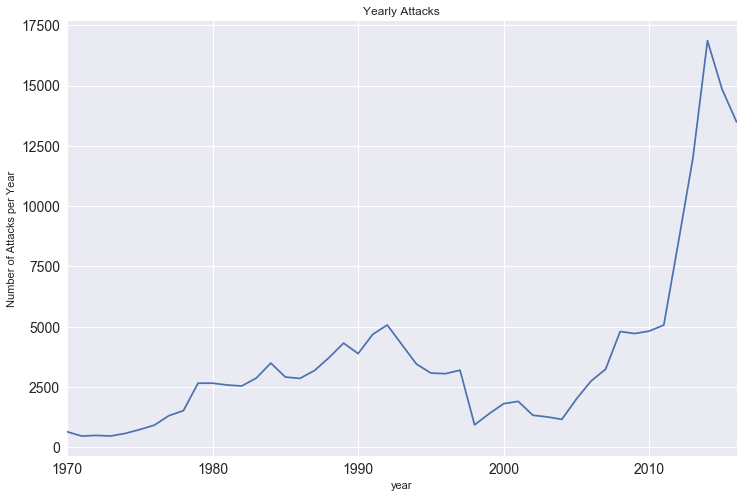

In [11]:
%matplotlib inline
df_.groupby("year").month.count().plot(figsize=(12,8),
                                         title= 'Yearly Attacks', 
                                         fontsize=14,
                                         )
plt.ylabel('Number of Attacks per Year')

month
1     14036
2     12975
3     14284
4     14213
5     15771
6     14258
7     15247
8     14802
9     13246
10    14728
11    14064
12    12706
Name: month, dtype: int64

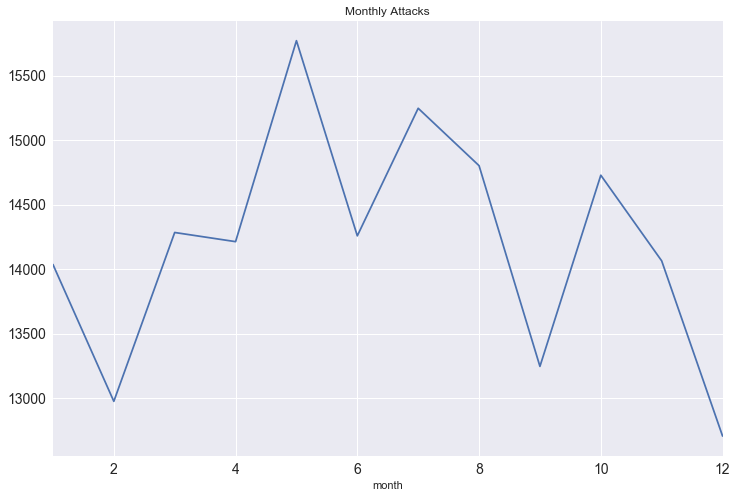

In [12]:
%matplotlib inline
df_.groupby("month").month.count().plot(figsize=(12,8),
                                         title= 'Monthly Attacks', 
                                         fontsize=14)
df_.groupby("month").month.count()

In [14]:
df_.to_csv('../data/gup_.csv')

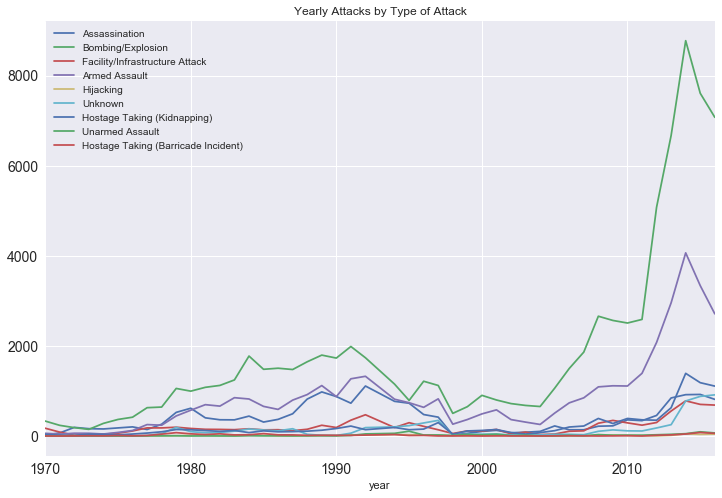

In [15]:
%matplotlib inline
l = df_.attacktype1_txt.unique()
for i in l:
    df_[df_.attacktype1_txt == i].groupby("year").attacktype1_txt.count().plot(figsize=(12,8),
                                         title= "Yearly Attacks by Type of Attack",                                      
                                         fontsize=14)
_ = plt.legend(df_.attacktype1_txt.unique())


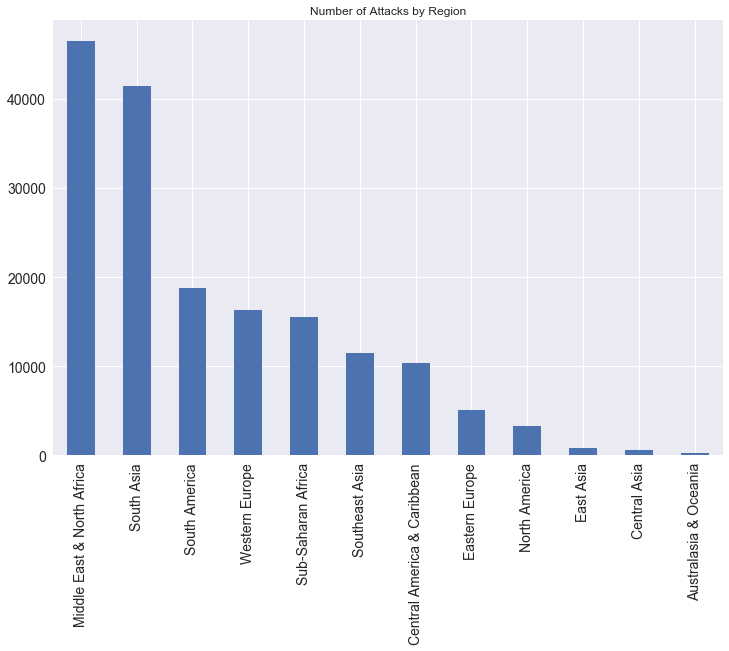

In [16]:
df_.region_txt.value_counts().plot(figsize=(12,8),
                                   kind = 'bar',
                                   title = "Number of Attacks by Region",
                                   fontsize = 14
                                   )
# let's see what regions have for terror attacks for the past 46 years.

## Sandbox. Playing with other datasets. Like urban population and oil prices

In [17]:
# import urban population data for each country in the past 46 years. 
# resource is World Bank
df_pop= pd.read_csv('../data/global_urban_population.csv')

In [18]:
# Convert the imported file into mergeable data
z = pd.DataFrame()
x = 0
for i in range(df_pop.shape[0]):
    for j in range(1,df_pop.shape[1]):
        z.set_value(x,'Country_Year', (df_pop['Country Name'][i] +"_" + str(df_pop.columns[j])))
        z.set_value(x,'Urban_Pop', df_pop.iloc[i][j])
        x += 1
z.head()

,Country_Year,Urban_Pop
0,Aruba_1970,29900.0
1,Aruba_1971,30082.0
2,Aruba_1972,30275.0
3,Aruba_1973,30470.0
4,Aruba_1974,30605.0


In [19]:
# I found the date with global population and wanted to get an idea if the global terrorism 
# is also a sign of overpopultion. Needed to convert it into a mergeable form for the Tableau visualization
z.to_csv('data/gup_zz.csv')

IOError: [Errno 2] No such file or directory: 'data/gup_zz.csv'

In [ ]:
oilprice = pd.read_csv('data/OilPrice.csv')

In [ ]:
oilprice.set_index(['year'], inplace = True)

In [ ]:
oilprice.plot()

In [ ]:
for i in df.region_txt.unique():
    print i, df.region[df.region_txt == i].mean()

## Part Two: Bayesian Inference
Terror attacks are a ripe area of research for Bayesian inference. Given their infrequency, it is (thankfully) difficult for us to assume a high number of samples that approach some normal distribution.
Because of this, <b>we should construct a prior about the amount of terror a given area has seen and update that prior with new information (like a new year of attacks or a contrasting country from within the same region).</b>
<u>You should compare two populations of your choosing using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area (or time period!)</u>
For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may make your prior assume that some country is a country in South America with μ average attacks and σ variation across South American countries. You would then update that prior with the information of a single country in South America as well as a separate country in South America. How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)
You should structure your own test of populations rather than using the above example. If you're unable to setup a different test, brainstorm with your squad in the Slack chat.
You must justify the prior you selected and interpret your results (use credible intervals.) Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)

In [20]:
# I would go with Bombings/Explosions in Russia
dfba = df_[(df_.attacktype1 == 3)&(df_.country == 167)]

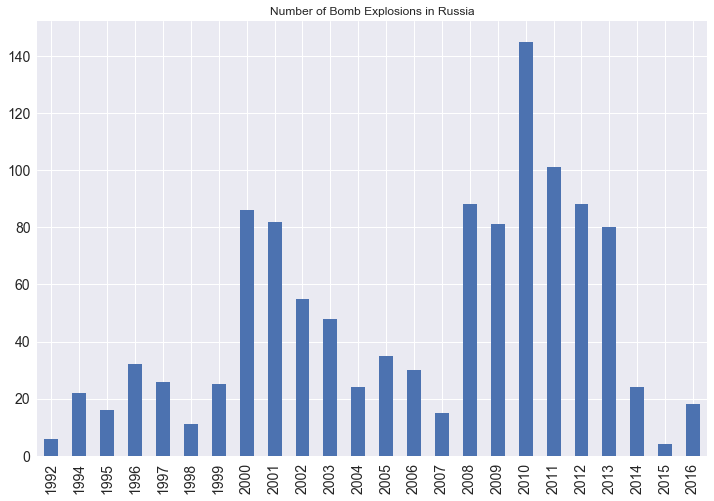

In [21]:
dfba.year.value_counts().sort_index().plot(figsize=(12,8),
                                   kind = 'bar',
                                   title = "Number of Bomb Explosions in Russia",
                                   fontsize = 14
                                   )

# Which is in line with the global trends and fead by price in oil that 
# They used to steal from pipelines

In [24]:
import pymc3 as pm
import theano as thno
import theano.tensor as T

In [25]:
# Let me see if terrorism in Dagestan and Chechnya before Vladimir Putin 
# became the president of Russia was of different nature?
dfba_prior = dfba[dfba.year < 2000]

In [26]:
# And after Putin has come to power
dfba_post = dfba[dfba.year >= 2000]

In [27]:
# Average number of bomb attacks in Russia before 2010:
prior_mean = dfba_prior.year.value_counts().mean()
prior_std = dfba_prior.year.value_counts().std()
print prior_mean
print prior_std

19.7142857143
9.1417410033


In [61]:
Dagestan = dfba_post[(dfba_post.provstate.str.contains('Dages'))|(dfba_post.city.str.contains('Dages'))].year.value_counts().values
Chechnya = dfba_post[(dfba_post.provstate.str.contains('Chech'))|(dfba_post.city.str.contains('Chech'))].year.value_counts().values
Ingushet = dfba_post[(dfba_post.provstate.str.contains('Chech'))|(dfba_post.city.str.contains('Chech'))].year.value_counts().values

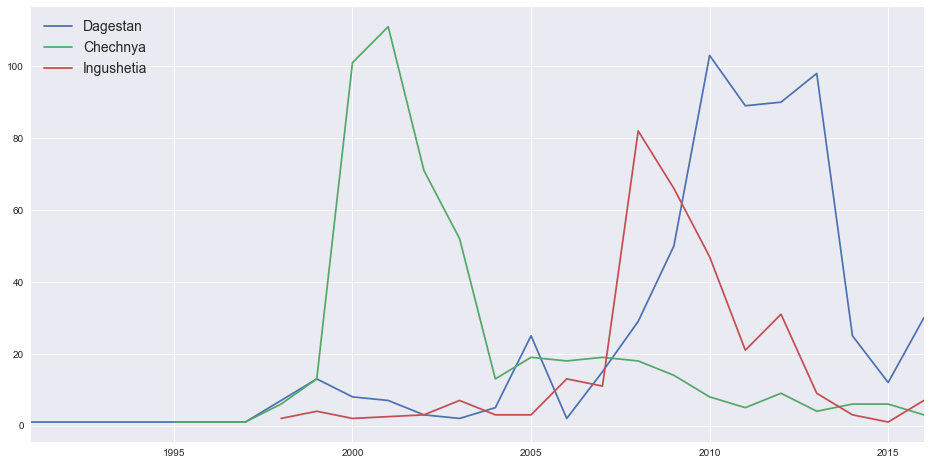

In [63]:
plt.figure(figsize=(16,8))
D = df_[(df_.provstate.str.contains('Dages'))|(df_.city.str.contains('Dages'))].year.value_counts().sort_index().plot()
Ch = df_[(df_.provstate.str.contains('Chech'))|(df_.city.str.contains('Chech'))].year.value_counts().sort_index().plot()
In = df_[(df_.provstate.str.contains('Ingush'))|(df_.city.str.contains('Ingush'))].year.value_counts().sort_index().plot()
plt.legend(['Dagestan', 'Chechnya', 'Ingushetia'], fontsize = 14)



In [35]:
# Instatiating the model
with pm.Model() as model:
    D_mean = pm.Normal('bombings_Dagestan_mean', prior_mean, sd = prior_std)
    Ch_mean = pm.Normal('bombings_Chech_mean', prior_mean, sd = prior_std)

In [314]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    D_std = pm.Uniform('bombings_Dagestan_st', lower = std_prior_lower, upper = std_prior_upper)
    Ch_std = pm.Uniform('bombings_Chechnya_st', lower = std_prior_lower, upper = std_prior_upper)

In [315]:

with model:

    grpD = pm.Normal('group_Dagestan', mu=D_mean,sd = D_std, observed=Dagestan)
    grpCh = pm.Normal('group_Chechnya', mu=Ch_mean,sd = Ch_std, observed=Chechnya)

In [316]:
with model:
    
    diff_of_means = pm.Deterministic('difference of means', D_mean - Ch_mean)
    diff_of_stds = pm.Deterministic('difference of stds', D_std - Ch_std)
    effect_size = pm.Deterministic(
        'effect size', 
        diff_of_means/np.sqrt((D_std**2+Ch_std**2)))
    

In [317]:
with model:

    trace = pm.sample(20000, njobs = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 156.93:   5%|▍         | 9088/200000 [00:00<00:14, 13039.87it/s]
Convergence archived at 9900
Interrupted at 9,900 [4%]: Average Loss = 161.14
100%|██████████| 20500/20500 [00:59<00:00, 342.14it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x14bcfd9d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x14cbc8a10>], dtype=object)

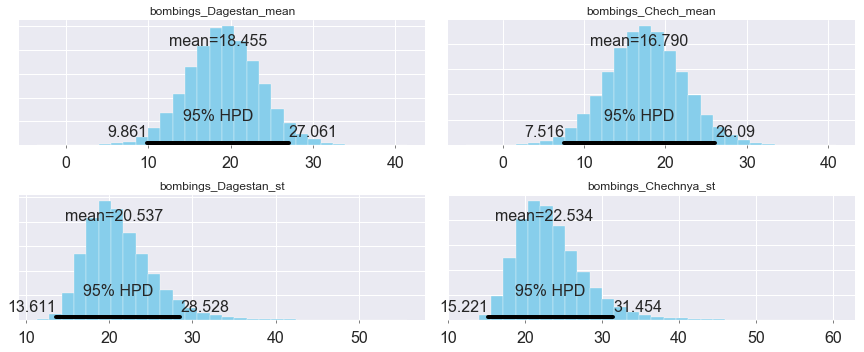

In [319]:
pm.plot_posterior(trace[2000:],
                 varnames = ['bombings_Dagestan_mean', 'bombings_Chech_mean',
                            'bombings_Dagestan_st', 'bombings_Chechnya_st'],
                 color = '#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x14e8cca90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13fc91350>], dtype=object)

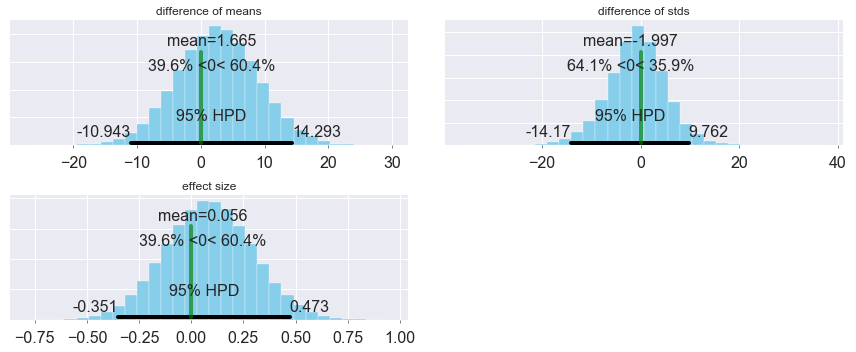

In [320]:
pm.plot_posterior(trace[2000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [321]:
pm.summary(trace[2000:], varnames = ['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.665            6.430            0.032            [-10.943, 14.293]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -10.992        -2.635         1.685          5.971          14.256


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -1.997           5.947            0.022            [-14.170, 9.762]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -14.160        -5.608         -1.918         1.721          9.784


effect size:

  Mean             SD               MC Error         95% H

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14ccb8390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14a6a7d10>]], dtype=object)

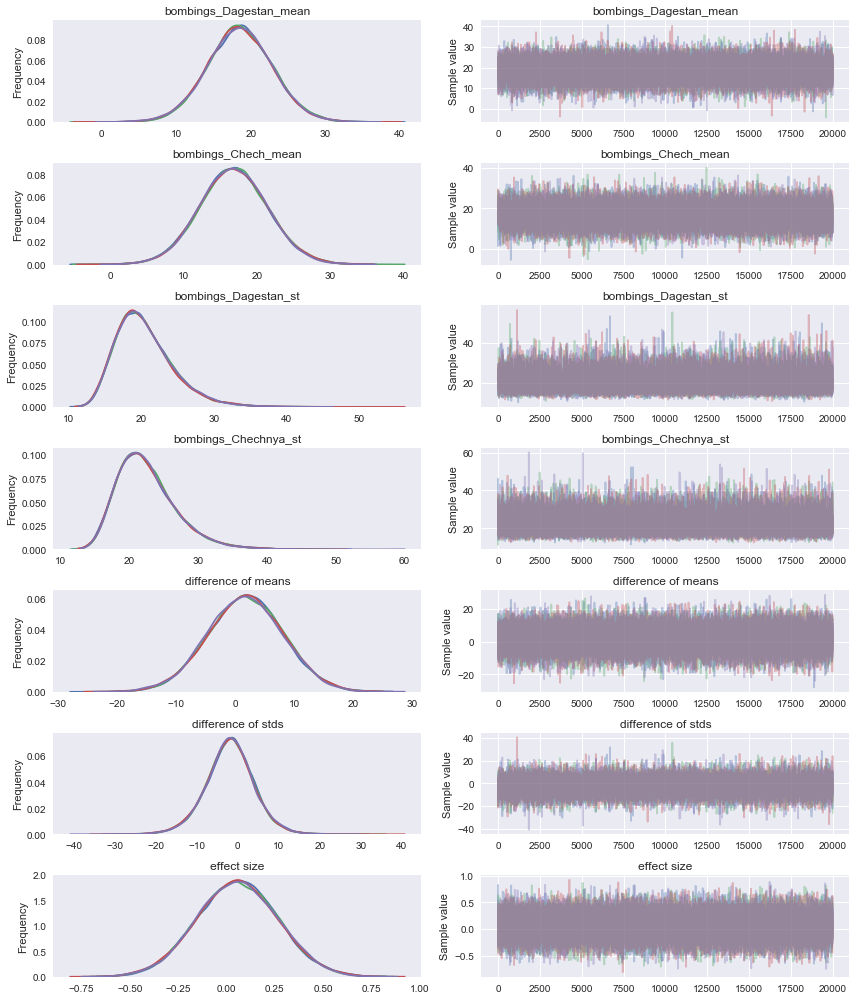

In [322]:
from pymc3 import traceplot

traceplot(trace)

## Part Three: 1993¶
The year 1993 is missing from our dataset! Given there is a wealth of information across different types of attacks, we will focus analysis on attacktype1 bombings (category 3, as per the codebook)
For this section, you should determine a methodology that allows you to best fill in the missing values. Perhaps you want to consider hemispheres to be separate models, for example. (That's the only hint you'll receive - and even that hint is not an optimal option.)
Once you've created your methodology and imputed the number of bombings in 1993, you should feel free to apply your methodology to OTHER attack categories. (Bonus opportunity: turn your method into a pipeline. Use that pipeline to fill in other missing attack values.)

In [546]:
# First let's select the how far we would to go to predict 1993
# You will see below on this notebook that I observed a correlation 
# with the oil price. And the observed correlation remains from two 
# to six years after. This means 6 effective years (2, 3, 4, 5, 6, 7)
# Meaning that I will look into 1970 until 1999

In [547]:
dfb_1993 = df_[(df_.attacktype1 ==3)&(df_.year >= 1970)&(df_.year < 2000)].year.value_counts().sort_index()

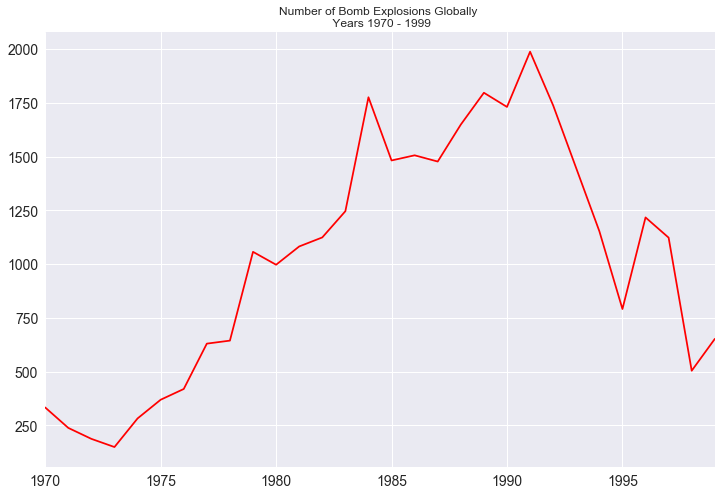

In [548]:
%matplotlib inline
dfb_1993.plot(figsize=(12,8),
                                   kind = 'line',
                                   title = "Number of Bomb Explosions Globally \n Years 1970 - 1999",
                                   fontsize = 14,
                                               color = 'red'
                                   )

In [549]:
dfb_1993.head()

1970    333
1971    238
1972    187
1973    149
1974    282
Name: year, dtype: int64

In [557]:
from statsmodels.tsa.stattools import adfuller

In [589]:

def test_stationarity(i, data):

    #Determing rolling statistics
    #Tried pd.rolling - it spits out a deprecation notification
    rolmean = data.rolling(window=i,center=False).mean()
    rolstd = data.rolling(window=i,center=False).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(data)#, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

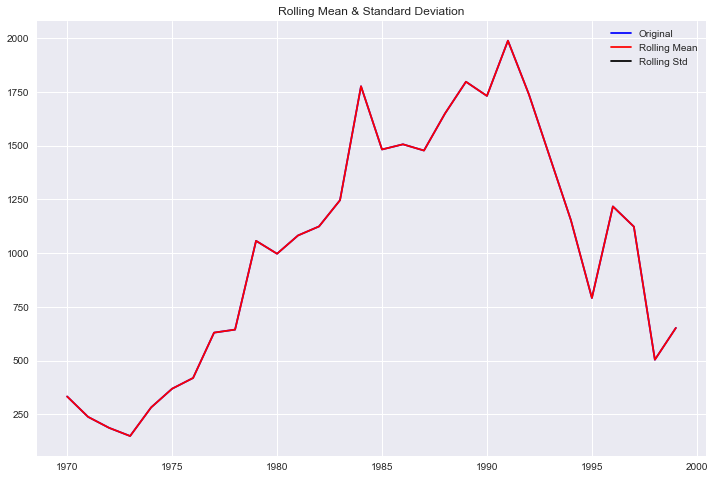

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  1


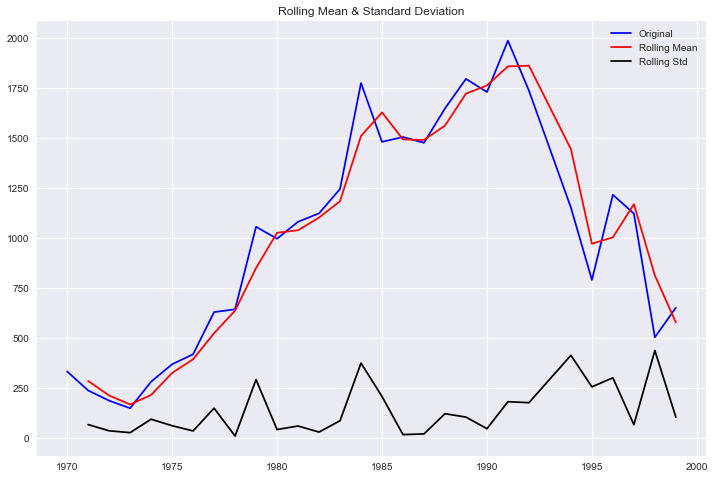

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  2


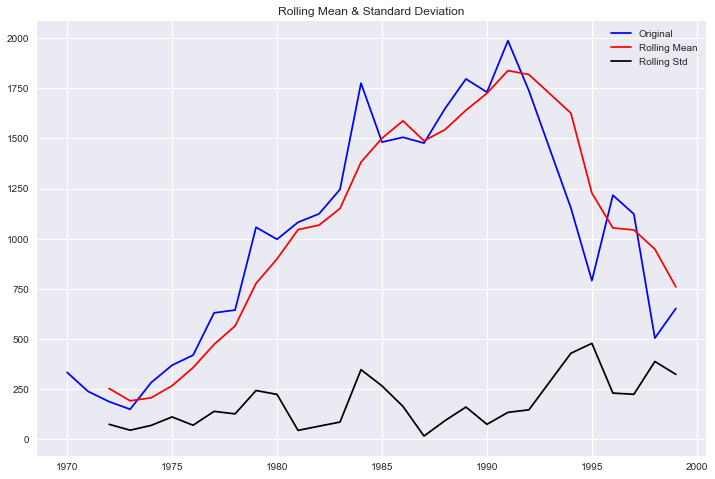

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  3


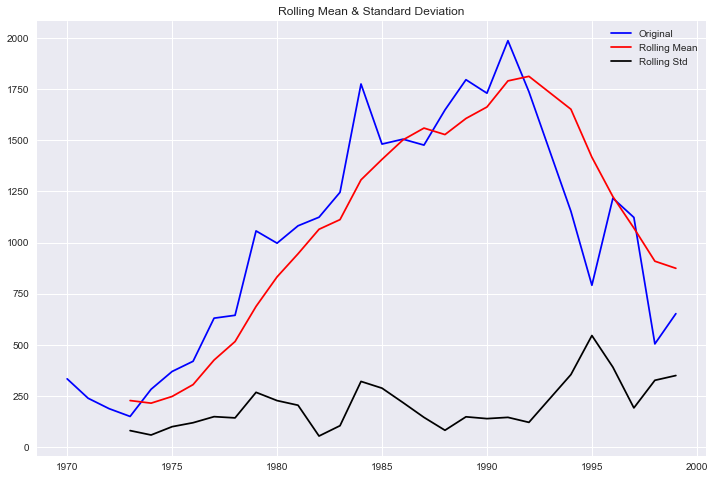

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  4


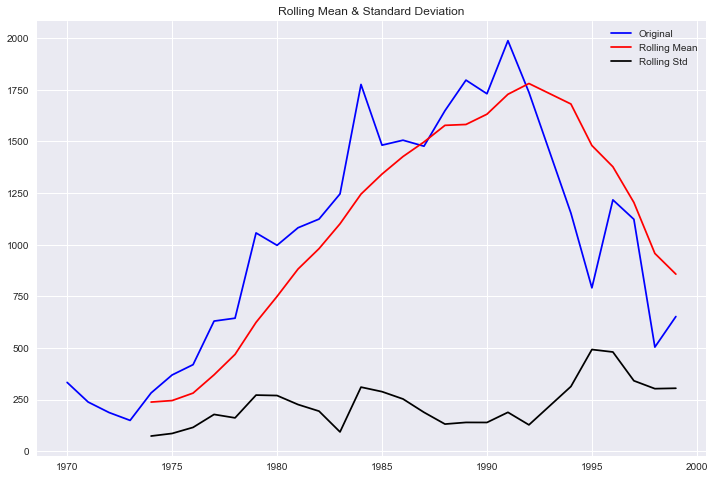

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  5


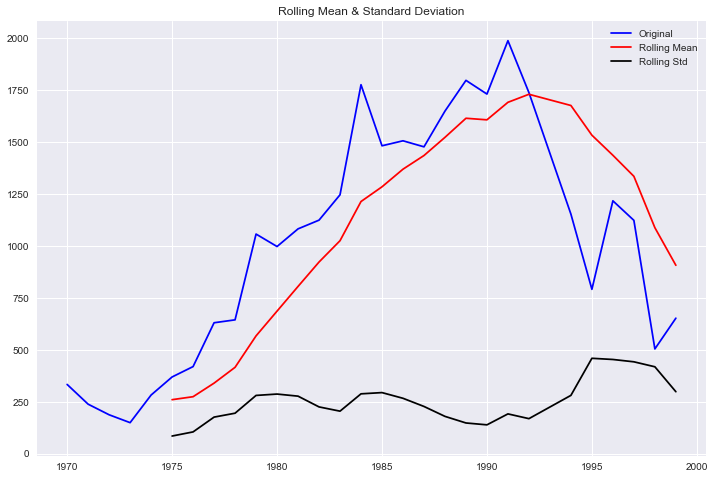

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  6


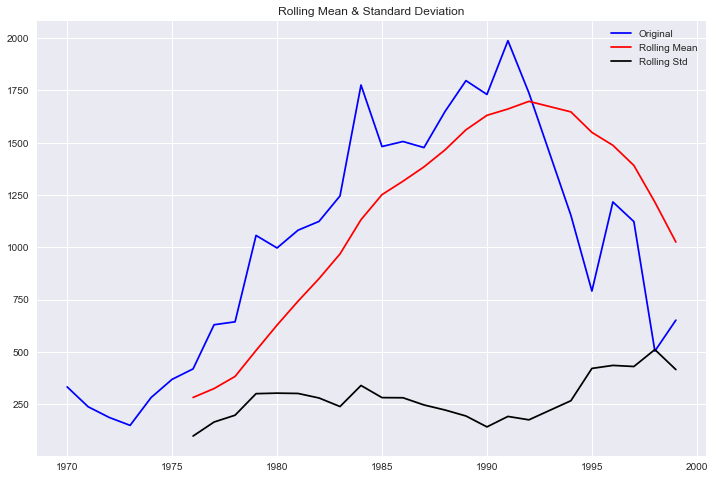

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  7


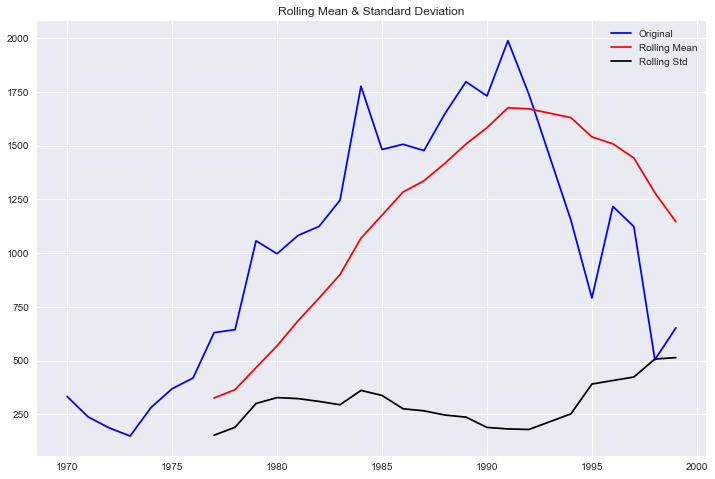

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  8


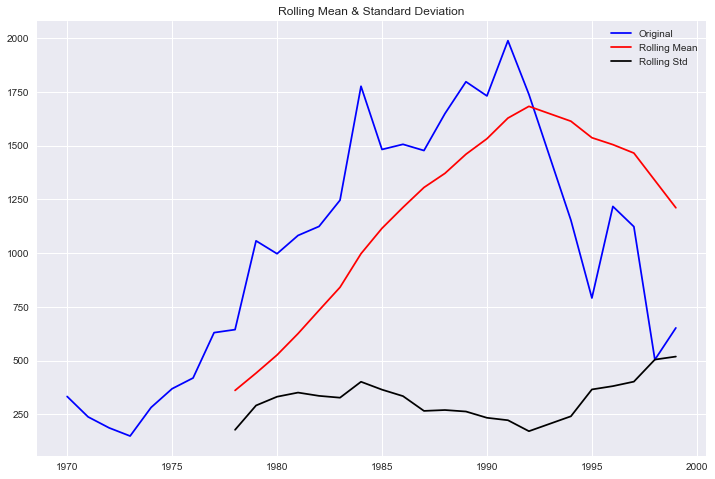

Results of Dickey-Fuller Test:
Test Statistic                 -2.444203
p-value                         0.129647
#Lags Used                      7.000000
Number of Observations Used    21.000000
Critical Value (5%)            -3.013098
Critical Value (1%)            -3.788386
Critical Value (10%)           -2.646397
dtype: float64
Lag -  9


In [618]:
for i in range(1,10):
    test_stationarity(i, dfb_1993)
    print 'Lag - ', i

#### I tried Dickey-Fuller Test on various regression and without a regression. The minimum achievable p-value is above. This means that unit root is not a reliable measure of stochastic process. Thus I will go with a rolling mean.

In [596]:
rollingmean = dfb_1993.rolling(window = 6, center=False).mean()
rollingmean

1970            NaN
1971            NaN
1972            NaN
1973            NaN
1974            NaN
1975     259.666667
1976     274.000000
1977     339.333333
1978     415.500000
1979     566.833333
1980     686.000000
1981     804.833333
1982     922.333333
1983    1025.000000
1984    1213.666667
1985    1284.500000
1986    1369.333333
1987    1435.166667
1988    1522.666667
1989    1614.500000
1990    1607.000000
1991    1691.333333
1992    1730.000000
1994    1676.000000
1995    1533.000000
1996    1436.333333
1997    1335.000000
1998    1087.666667
1999     906.666667
Name: year, dtype: float64

In [615]:
# Since, Dickey-Fuller p-value in none of iterations achieved <.05 threshold
# I will use the rolling mean with a window of 6 years behind
# and will calculate the average of the rolling mean for 1992 and 1994
print 'The estimated number of bombings in 1993 is - ', rollingmean[22:24].mean()

The estimated number of bombings in 1993 is -  1703.0


## Found data on oil prices. Graphically, there is a visible correlation between the oil price and the spykes in the number of terror attacks. Wanted to see if it reflects on numbers. 

In [518]:
# So I re-run the same code and shift the oil price 
# from 0 to 9 years behind, to see if there is a delayed effect

In [516]:
Rcoef = []
for i in range(10):
    oilprice = pd.read_csv('data/OilPrice.csv')
    oilprice.set_index(['year'], inplace = True)
    oilprice.OilPrice = oilprice.OilPrice.shift(i)
    dt = pd.DataFrame(df_.year.value_counts().sort_index())
    dt.rename(columns = {'year':'NAttacks'}, inplace = True)
    result = dt.join(oilprice, how = 'inner')
    result.dropna(inplace = True)
    Rcoef.append([i, np.corrcoef(result.NAttacks, result.OilPrice)[0,1]])

In [517]:
Rcoef

[[0, 0.30980912578825276],
 [1, 0.4795848590166959],
 [2, 0.59225100395794661],
 [3, 0.58892375992158874],
 [4, 0.57763461354041634],
 [5, 0.55058267312996534],
 [6, 0.55071667825621773],
 [7, 0.52625825483024113],
 [8, 0.50824527921362839],
 [9, 0.37333712263327307]]

### So, there is a visible correlation between the oil prices and spykes in terrorist activity with a two year lag. It means that oil as well as other commodities, and drug trafficking shall be under a strict control as well as money laundering as they tend to enentually end up in arming various groups of interest. 

Summary

EDA
Our dataset had over 170 thousand observations with 135 features. I focused only on those that had were more consistent from observation to observation. Left 20 features and only those observations that had clear attachment to location. Dropped observations with 0 months, and fixed day 0’s to 1’s.

Added observations on urban population and oil price for the same number of years. 

Bayesian inference
I was reading about the first and second Russian war on Chechnya. Chechnya announced independence from Russia in 1994 and Russia introduced its troops almost the same year. The military campaign was held by Yeltsin and ended in 1996. There was another one in 1999 - 2000 before Putin was appointed as Russia’s interim leader. I checked on details of how Chechen rebels financed their activity and it turned out that they were stealing oil from the bypassing oil pipelines. It became clear that the terrorist activity spreads along the oil producing areas in the North Caucasus. So I decided to compare if terrorist activity is different or similar in the neighboring republic of Dagestan. Compared the means and standard distribution on both republics and they turned out to be very similar. 

It is particularly interesting to observe because there is another Republic of Ingushetia, that is ethnically much closer to Chechnya but it has not been so much involved into terrorist activity. 

Imputing 1993
It was a very simple task, since I connected the correlation between oil and terrorist activity I take terrorist activity as far as 6 years ago to impute 1993. The next step was just to calculate the average mean of 1994 and 1992. 
